In [1]:
from rich.console import Console

from canonical_toolkit.utils.initialize import generate_random_population_parallel
import canonical_toolkit as ctk

import canonical_toolkit.morphology.similarity as sim

# For visualization examples later
from canonical_toolkit.morphology.visual import (
    load_or_generate_cache,
    plot_embedding_grid,
    plot_robot_grid,
    RobotGridConfig,
)

In [2]:
graph_population = generate_random_population_parallel(10, n_jobs=1)
node_population = [ctk.node_from_graph(graph) for graph in graph_population]

Output()

In [3]:
population_fingerprint = sim.collect_population_fingerprint(node_population)

In [4]:
feature_series = sim.series_from_population_fingerprint(population_fingerprint)
print(feature_series)

MatrixSeries: DEFAULT                            
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                DEFAULT                ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     1 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     2 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     3 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     4 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     5 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     6 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     7 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     8 │ [10×48] Sparse {'domain': 'FEATURES'} │
│     9 │ [10×48] Sparse {'domain': 'FEATURES'} │
│    10 │ [10×48] Sparse {'domain': 'FEATURES'} │
│    11 │ [10×48] Sparse {'domain': 'FEATURES'} │
│    12 │ [10×48] Sparse {'domain': 'FEATURES'} │
└───────┴───────────────────────────────────────┘

In [5]:
cos_series = feature_series.cosine_similarity(inplace=False).normalize_by_radius()
print(cos_series)

MatrixSeries: DEFAULT                             
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃                DEFAULT                 ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     1 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     2 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     3 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     4 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     5 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     6 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     7 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     8 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│     9 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│    10 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│    11 │ [10×10] Dense {'domain': 'SIMILARITY'} │
│    12 │ [10×10] Dense {'domain': 'SIMILARITY'} │
└───────┴────────────────────────────────────────┘

In [6]:
print(cos_series[0])
cumul_series = cos_series.to_cumulative(inplace=False).normalize_by_radius(inplace=False)
print(cumul_series[12])

MatrixInstance: DEFAULT [0]               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ SIMILARITY                  │
│ Values   │ 1.00  1.00  ...  1.00  0.95 │
│          │ 1.00  1.00  ...  1.00  0.95 │
│          │ ...   ...   ...   ...       │
│          │ 1.00  1.00  ...  1.00  0.95 │
│          │ 0.95  0.95  ...  0.95  1.00 │
└──────────┴─────────────────────────────┘

MatrixInstance: DEFAULT [12]              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ SIMILARITY                  │
│ Values   │ 0.21  0.10  ...  0.09  0.09 │
│          │ 0.10  0.24  ...  0.09  0.09 │
│          │ ...   ...   ...   ...       │
│          │ 0.09  0.09  ...  0.19  0.07 │
│          │ 0.09  0.09  ...  0.07  0.19 │
└──────────┴─────────────────────────────┘

In [7]:
agg_feature_matrix = feature_series.aggregate() 
print(agg_feature_matrix)

MatrixInstance: AGGREGATED [12] 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value             ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×48]           │
│ Storage  │ Sparse (csr)      │
│ Non-zero │ 302 / 480         │
│ Sparsity │ 37.08%            │
│ Domain   │ FEATURES          │
│ Samples  │   [0,0] = 2.0000  │
│          │   [0,1] = 1.0000  │
│          │   [0,2] = 1.0000  │
│          │   [0,5] = 1.0000  │
│          │   [0,7] = -1.0000 │
│          │   ... (297 more)  │
└──────────┴───────────────────┘

In [8]:
agg_cos_matrix = agg_feature_matrix.cosine_similarity()
print(agg_cos_matrix)

MatrixInstance: AGGREGATED [12]           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Property ┃ Value                       ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Shape    │ [10×10]                     │
│ Storage  │ Dense                       │
│ Domain   │ SIMILARITY                  │
│ Values   │ 1.00  0.54  ...  0.48  0.74 │
│          │ 0.54  1.00  ...  0.49  0.47 │
│          │ ...   ...   ...   ...       │
│          │ 0.48  0.49  ...  1.00  0.46 │
│          │ 0.74  0.47  ...  0.46  1.00 │
└──────────┴─────────────────────────────┘

In [9]:
frame = sim.SimilarityFrame([cumul_series, sim.SimilaritySeries([agg_cos_matrix])])
print(frame)

MatrixFrame (2 series × 13 indices)                                    
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃           DEFAULT            ┃          AGGREGATED          ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     1 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     2 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     3 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     4 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     5 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     6 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     7 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     8 │ [10×10] Dn domain:SIMILARITY │             ...              │
│     9 │ [10×10] Dn domain:SIMILARITY │             ...              │
│    10 │ [10×10] Dn domain:SIMILARITY │             ...              │
│    11 │ [10×10] Dn domain:SIMILARITY │             ...              │
│    12 │ [10×10] Dn domain:SIMILARITY │ [10×10] Dn domain:SIMILARITY │
└───────┴──────────────────────────────┴──────────────────────────────┘

## Example: Complete Visualization Pipeline

This section demonstrates the new clean grid visualization workflow:
1. Generate UMAP embeddings from features
2. Build MatrixFrame with embeddings
3. Convert to grid configs using pipeline
4. Plot with interactive (Bokeh) or static (Matplotlib) modes

In [10]:
# Step 1: Generate UMAP embeddings from feature series
from umap import UMAP
import numpy as np
from canonical_toolkit.base.matrix import MatrixFrame, MatrixSeries, MatrixInstance

# Create UMAP reducer
reducer = UMAP(n_components=2, n_neighbors=5, min_dist=0.1, metric='cosine', random_state=42)

# Apply UMAP to each radius in the feature series
embedding_instances = []
for radius_idx in feature_series.indices:
    # Get feature matrix for this radius (10 robots × 48 features)
    feature_matrix = feature_series[radius_idx].matrix
    
    # Reduce to 2D embeddings (10 robots × 2)
    embeddings_2d = reducer.fit_transform(feature_matrix)
    
    # Center around 0
    embeddings_2d = embeddings_2d - embeddings_2d.mean(axis=0)
    
    # Wrap in MatrixInstance
    inst = MatrixInstance(
        matrix=embeddings_2d,
        label="UMAP",
        index=radius_idx,
        tags={"type": "umap", "n_neighbors": 5}
    )
    embedding_instances.append(inst)

# Create MatrixFrame with the embeddings
embedding_frame = MatrixFrame(series=[MatrixSeries(instances_list=embedding_instances)])
print(embedding_frame)

/home/salo/projects/ariel-zoo/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


MatrixFrame (1 series × 13     
indices)                       
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃        UMAP         ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×2] Dn type:umap │
│     1 │ [10×2] Dn type:umap │
│     2 │ [10×2] Dn type:umap │
│     3 │ [10×2] Dn type:umap │
│     4 │ [10×2] Dn type:umap │
│     5 │ [10×2] Dn type:umap │
│     6 │ [10×2] Dn type:umap │
│     7 │ [10×2] Dn type:umap │
│     8 │ [10×2] Dn type:umap │
│     9 │ [10×2] Dn type:umap │
│    10 │ [10×2] Dn type:umap │
│    11 │ [10×2] Dn type:umap │
│    12 │ [10×2] Dn type:umap │
└───────┴─────────────────────┘

In [11]:
# Step 2: Convert MatrixFrame to grid configs using the pipeline
from canonical_toolkit.morphology.similarity.pipeline import frame_to_embedding_grid

# Convert embeddings to grid config (1 row per radius, 1 column for UMAP series)
grid_configs = frame_to_embedding_grid(
    frame=embedding_frame,
    population_size=len(graph_population),
    title_fn=lambda label, idx: f"Radius {idx}",  # Custom titles
    default_dot_size=10,
    highlight_dot_size=15,
)

print(f"Created {len(grid_configs)} rows × {len(grid_configs[0])} columns of configs")
print(f"First config: {grid_configs[0][0].title}")
print(f"Embeddings shape: {grid_configs[0][0].embeddings.shape}")

Created 13 rows × 1 columns of configs
First config: Radius 0
Embeddings shape: (10, 2)


In [12]:
# Step 3a: Plot INTERACTIVE (Bokeh with hover) - requires thumbnails
from canonical_toolkit.morphology.visual import plot_embedding_grid, load_or_generate_cache

# Load thumbnails (uses __data__/img by default, like MatrixFrame.save())
thumbnails = load_or_generate_cache(
    population=graph_population,
    scale=0.3,  # 30% size for performance
)

# Plot with interactivity
plot_embedding_grid(
    sub_plots=grid_configs,
    interactive=True,  # Bokeh mode
    population_thumbnails=thumbnails,
    super_title="UMAP Embeddings by Radius (Interactive)",
    global_axis=True,  # All subplots share same axis range
    plot_height=250,
    max_full_width=800,
)

Cache not found, generating 10 images...

Output()

Generated 10/10 images

Output()

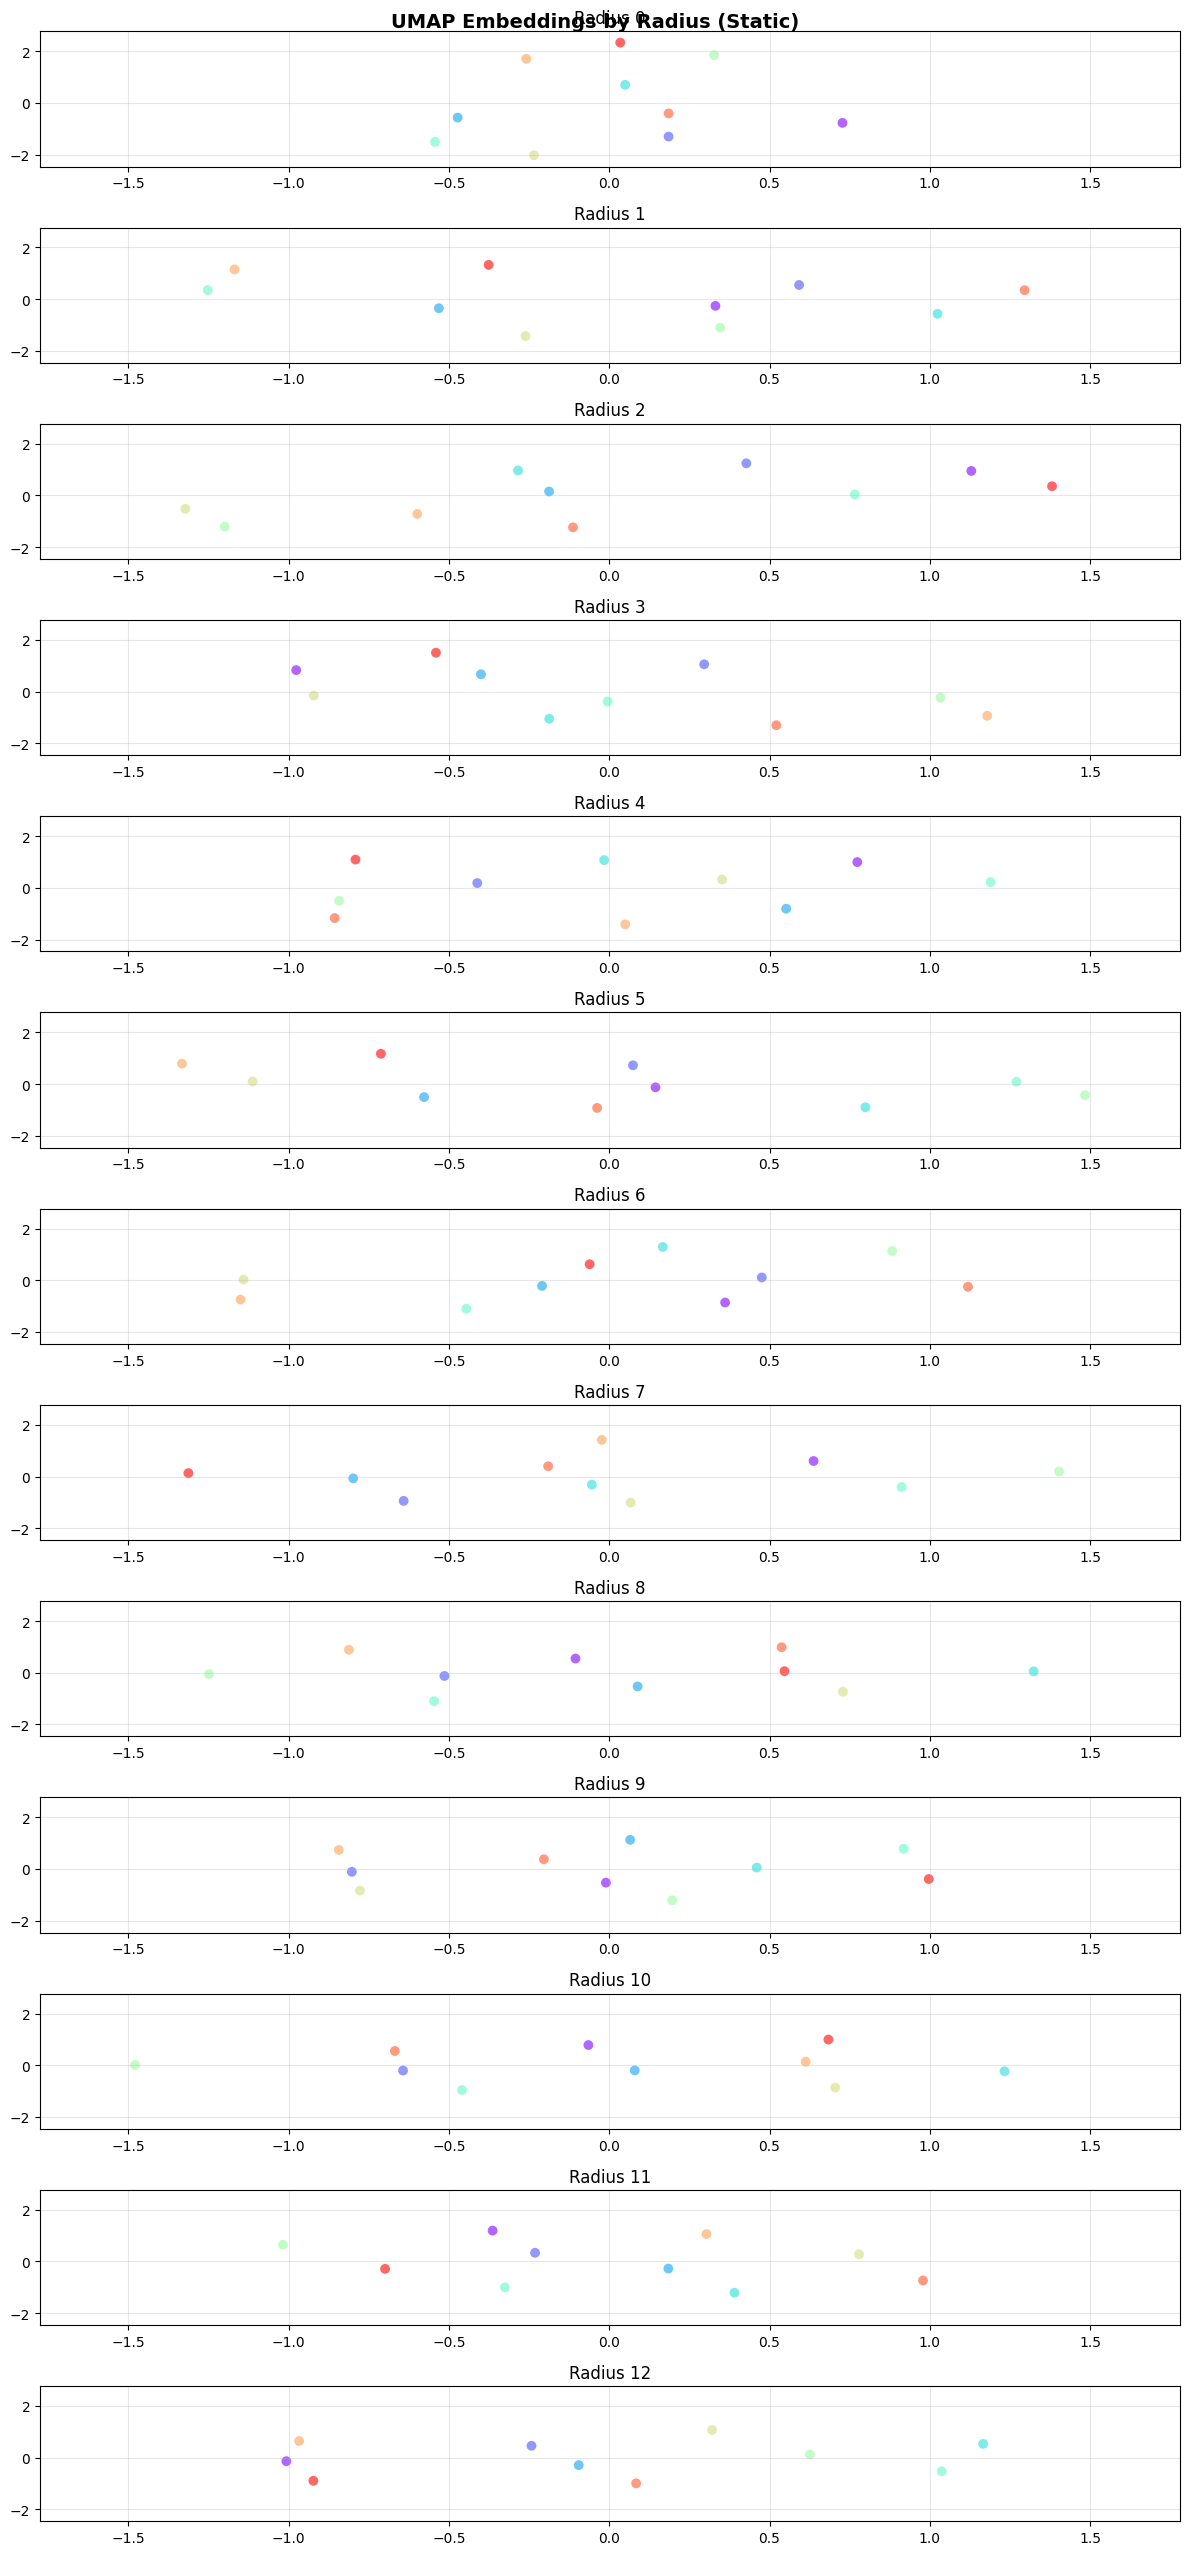

In [13]:
# Step 3b: Plot STATIC (Matplotlib) - no thumbnails needed, faster
plot_embedding_grid(
    sub_plots=grid_configs,
    interactive=False,  # Matplotlib mode
    super_title="UMAP Embeddings by Radius (Static)",
    global_axis=True,
    plot_height=200,
    max_full_width=1200,
)

### Example: Heatmap Grid from Similarity Matrices

In [14]:
# Create a similarity MatrixFrame from cos_series (already has similarity matrices)
from canonical_toolkit.morphology.similarity.pipeline import frame_to_heatmap_grid

# Wrap the similarity series in a frame
similarity_frame = MatrixFrame(series=[cos_series])

# Convert to heatmap grid configs
heatmap_configs = frame_to_heatmap_grid(
    frame=similarity_frame,
    title_fn=lambda label, idx: f"Similarity @ Radius {idx}",
    colormap="RdYlGn",  # Red-Yellow-Green colormap
    vmin=0.0,
    vmax=1.0,
)

print(f"Created {len(heatmap_configs)} rows × {len(heatmap_configs[0])} columns of heatmap configs")

Created 13 rows × 1 columns of heatmap configs


### Example: Robot Image Grid

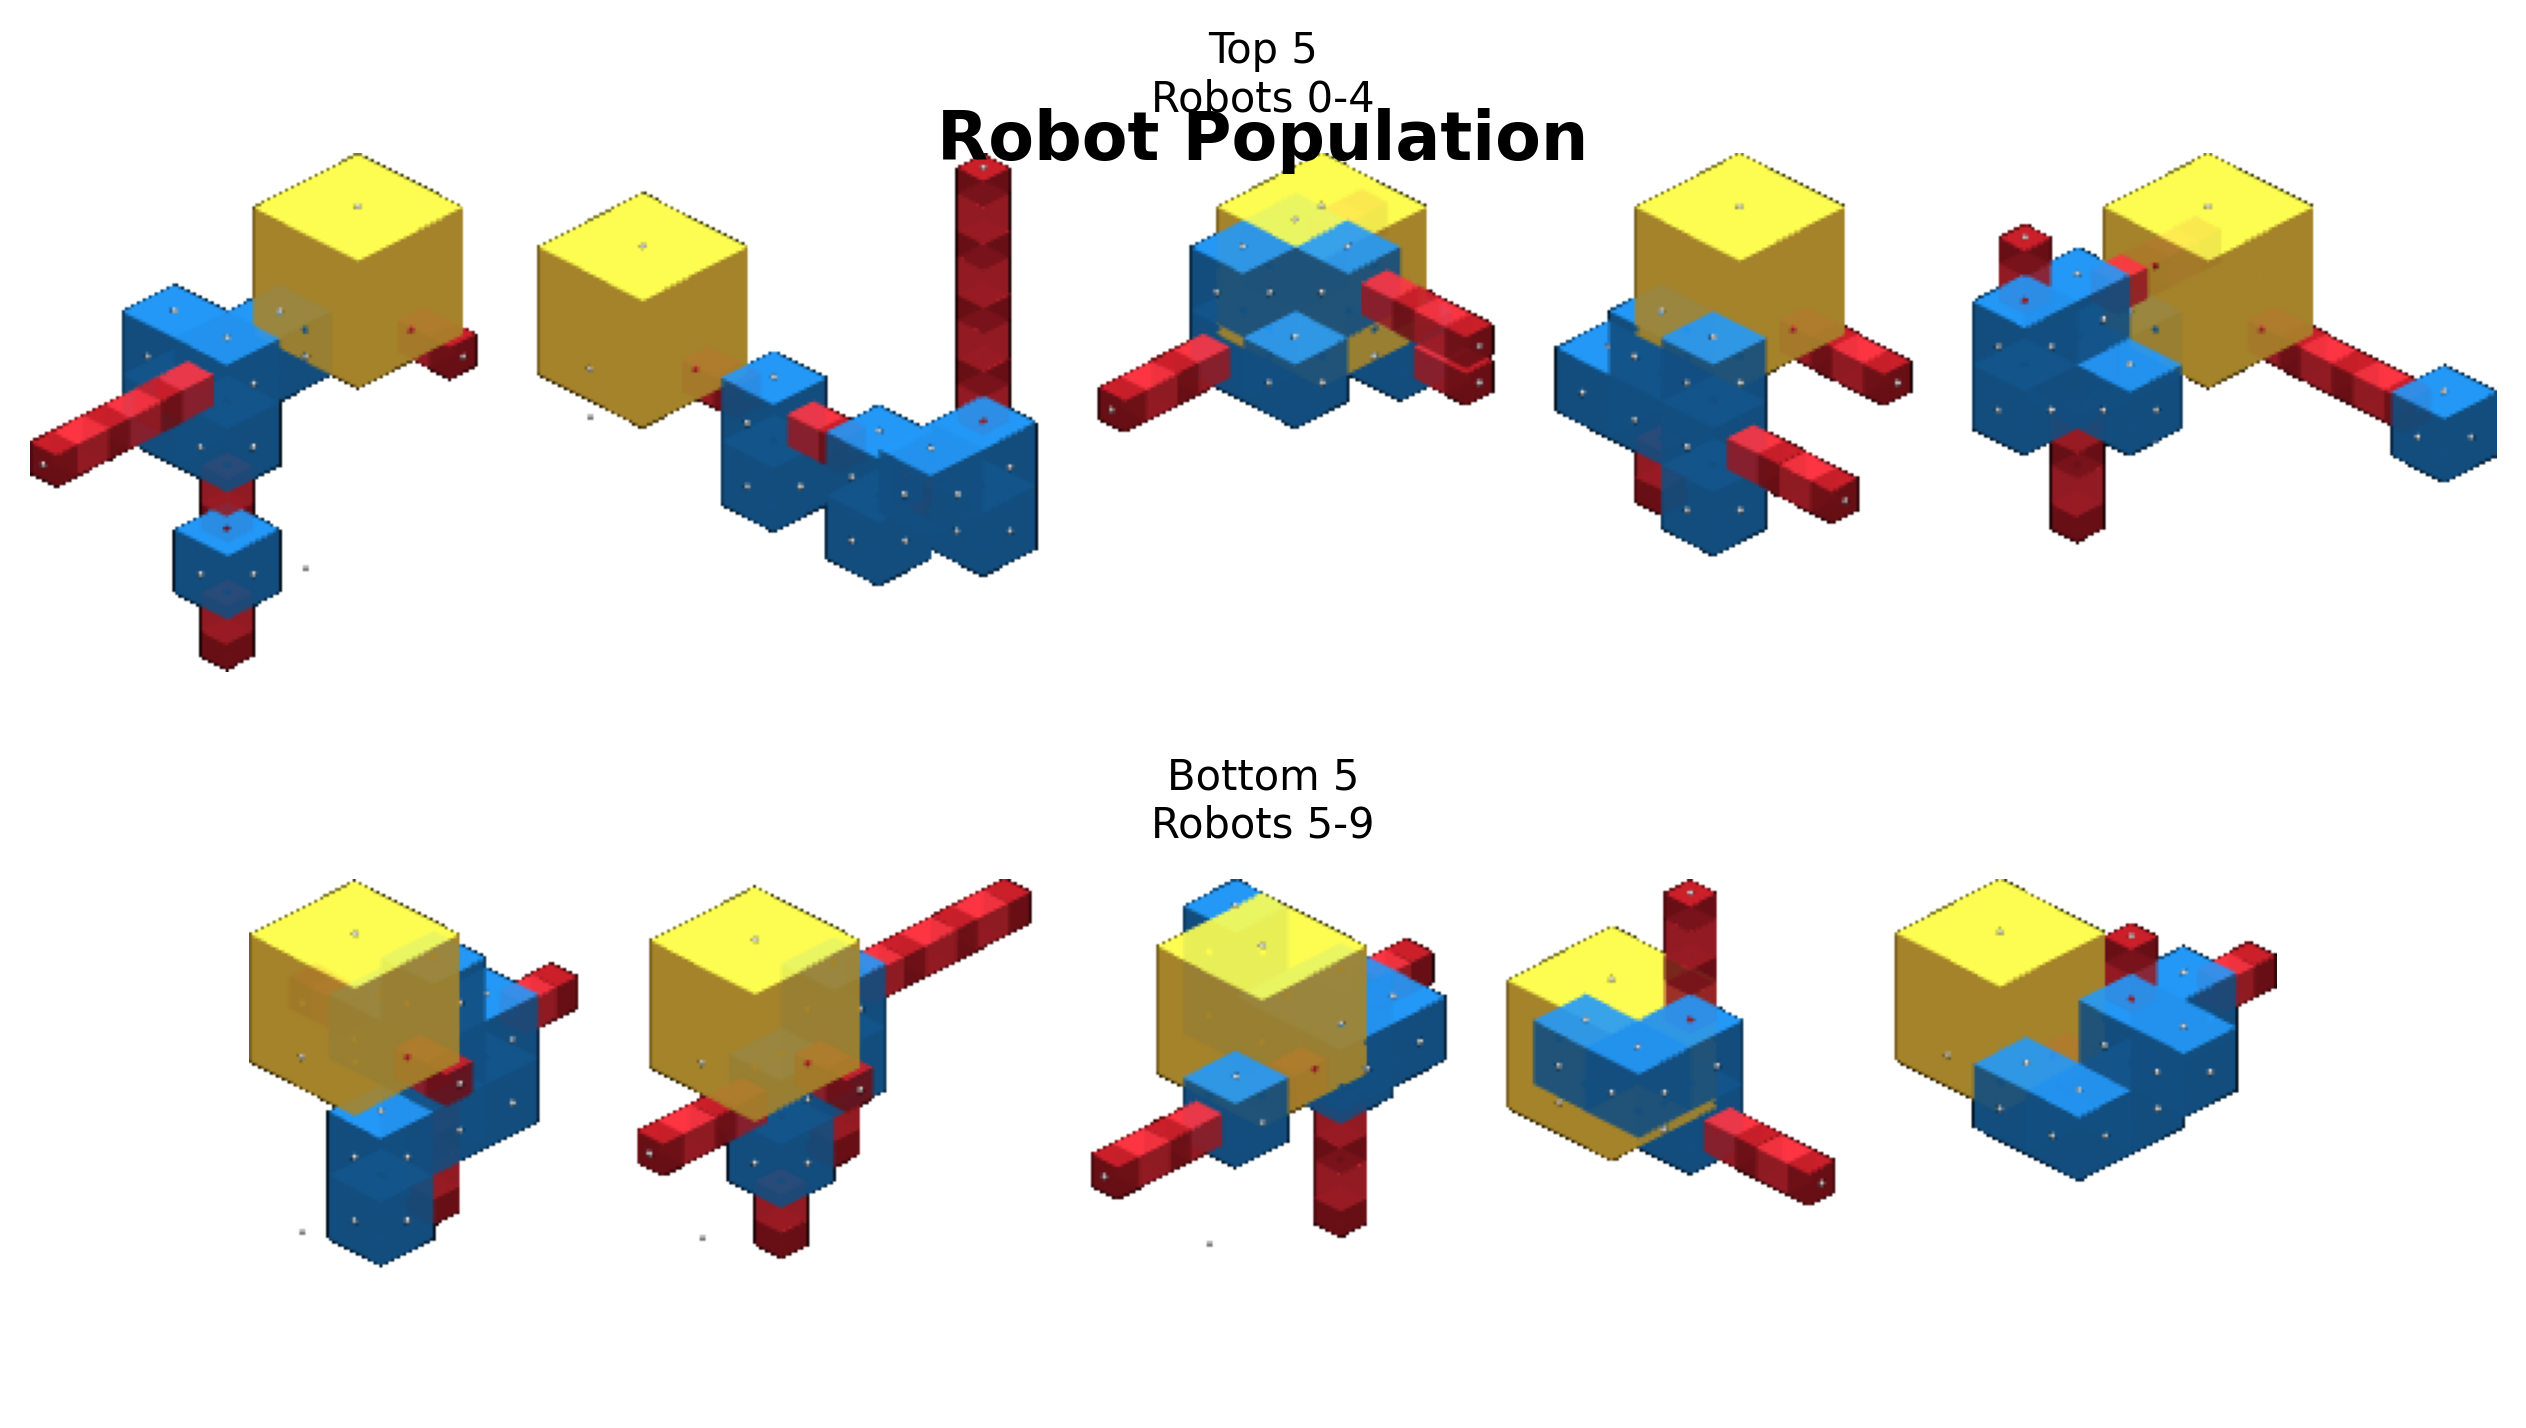

In [15]:
# Create robot grid configs manually
from canonical_toolkit.morphology.visual import RobotGridConfig, plot_robot_grid

# Simple example: show first 10 robots in 2 rows
robot_configs = [
    [
        RobotGridConfig(
            title="Top 5",
            under_title="Robots 0-4",
            idxs=[0, 1, 2, 3, 4],
        ),
    ],
    [
        RobotGridConfig(
            title="Bottom 5",
            under_title="Robots 5-9",
            idxs=[5, 6, 7, 8, 9],
        ),
    ],
]

# Plot (uses __data__/img by default)
plot_robot_grid(
    sub_plots=robot_configs,
    main_title="Robot Population",
    max_full_width=16,
    subplot_height=2.5,
)

### Advanced Example: Multi-Series Frame (Multiple Body Parts)

In practice, you'd analyze different body parts separately, creating a frame with multiple series (one per body part). This creates a grid where:
- **Rows** = radii (0, 1, 2, ...)
- **Columns** = body parts (core, front, left, back, etc.)

In [16]:
# Advanced: Multi-series frame (simulated example with different UMAPs)
# In real use, you'd process different body parts separately

# Simulate multiple body parts by creating different UMAP projections
multi_series = []
body_parts = ["core", "front", "left", "back"]

for part_name in body_parts:
    # Create UMAP with different parameters per part (just for demo)
    part_reducer = UMAP(
        n_components=2, 
        n_neighbors=3 + len(part_name),  # Vary params by part
        min_dist=0.1, 
        random_state=42 + len(part_name)
    )
    
    # Process each radius
    part_instances = []
    for radius_idx in range(0, 4):  # Just show first 4 radii
        if radius_idx < len(feature_series.indices):
            feature_matrix = feature_series[radius_idx].matrix
            embeddings_2d = part_reducer.fit_transform(feature_matrix)
            embeddings_2d = embeddings_2d - embeddings_2d.mean(axis=0)
            
            inst = MatrixInstance(
                matrix=embeddings_2d,
                label=part_name,
                index=radius_idx,
                tags={"type": "umap", "body_part": part_name}
            )
            part_instances.append(inst)
    
    multi_series.append(MatrixSeries(instances_list=part_instances))

# Create multi-series frame
multi_frame = MatrixFrame(series=multi_series)
print(multi_frame)

/home/salo/projects/ariel-zoo/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


MatrixFrame (4 series × 4 indices)                                                               
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃        core         ┃        front        ┃        left         ┃        back         ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│     0 │ [10×2] Dn type:umap │ [10×2] Dn type:umap │ [10×2] Dn type:umap │ [10×2] Dn type:umap │
│     1 │ [10×2] Dn type:umap │ [10×2] Dn type:umap │ [10×2] Dn type:umap │ [10×2] Dn type:umap │
│     2 │ [10×2] Dn type:umap │ [10×2] Dn type:umap │ [10×2] Dn type:umap │ [10×2] Dn type:umap │
│     3 │ [10×2] Dn type:umap │ [10×2] Dn type:umap │ [10×2] Dn type:umap │ [10×2] Dn type:umap │
└───────┴─────────────────────┴─────────────────────┴─────────────────────┴─────────────────────┘

In [17]:
# Convert multi-series frame to grid (rows=radii, cols=body parts)
multi_grid_configs = frame_to_embedding_grid(
    frame=multi_frame,
    population_size=len(graph_population),
    title_fn=lambda label, idx: f"{label.upper()} | R={idx}",
    default_dot_size=8,
)

print(f"Grid: {len(multi_grid_configs)} rows × {len(multi_grid_configs[0])} cols")

# Plot the full grid
plot_embedding_grid(
    sub_plots=multi_grid_configs,
    interactive=True,
    population_thumbnails=thumbnails,
    super_title="Multi-Part UMAP Analysis (Rows=Radii, Cols=Body Parts)",
    global_axis=True,
    plot_height=200,
    max_full_width=1200,
)

Grid: 4 rows × 4 cols


Opening "/home/salo/.local/share/uv/python/cpython-3.12.9-linux-x86_64-gnu/lib/python3.12/runpy.html" with Vim  (text/html)
E [fontpack.cc:218] Error: No Regular variant of the requested font '9x18' could be identified.


terminate called after throwing an instance of 'std::runtime_error'
  what():  No suitable files for '9x18' found!


Opening "/home/salo/.local/share/uv/python/cpython-3.12.9-linux-x86_64-gnu/lib/python3.12/runpy.html" with Vim  (text/html)
E [fontpack.cc:218] Error: No Regular variant of the requested font '9x18' could be identified.


terminate called after throwing an instance of 'std::runtime_error'
  what():  No suitable files for '9x18' found!


### Key Points

**Clean Defaults:**
- `load_or_generate_cache(population)` → uses `__data__/img` (like `MatrixFrame.save()`)
- `plot_robot_grid(configs)` → uses `__data__/img` by default
- All cache functions now follow the same pattern as matrix/frame saving

**Type-Safe Pipeline:**
- `frame_to_embedding_grid()` → converts embeddings to `EmbeddingGridConfig`
- `frame_to_heatmap_grid()` → converts similarity to `HeatmapGridConfig`
- No **kwargs ambiguity!

**Interactive Toggle:**
- `interactive=True` → Bokeh with hover (requires thumbnails)
- `interactive=False` → Matplotlib static (faster, no cache needed)